In [1]:
%pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
Note: you may need to restart the kernel to use updated packages.


In [57]:
import pandas 
from PIL import Image
full_df = pandas.read_csv('../mincult-train/train.csv', sep=';')
full_df['path'] = '../mincult-train/train/'+ full_df['object_id'].astype(str) + '/' + full_df['img_name']
full_df['embedding_path'] = full_df['path']+'.embedding'
N = 100
df = full_df[:N].copy()

In [4]:
# from PIL import Image
# import clip
# import torch
# device = "cuda" if torch.cuda.is_available() else "cpu"
# print(f"using {device}")
# device = torch.device(device)
# model, preprocess = clip.load("ViT-B/32")
# model.to(device)

from sentence_transformers import SentenceTransformer, util

# We use the original clip-ViT-B-32 for encoding images
img_model = SentenceTransformer('clip-ViT-B-32')

ModuleNotFoundError: No module named 'sentence_transformers'

In [5]:
df.iloc[[1]].path.values[0]

'./mincult-train/train/4489444/9461061.jpg'

In [7]:
from scipy.spatial import distance

def find_best(image_path): 
    emb = img_model.encode([Image.open(image_path)])[0].tolist()
    distances = {} 
    for index, row in df.iterrows(): 
        with open(row.embedding_path, 'r') as f:
            other_emb = json.loads(f.readline())
            dist = distance.cosine(emb, other_emb)
            distances[index] = dist
    dists = sorted(list(distances.items()), key=lambda a: a[1])[:10] 
    for i, dist in dists: 
        print(df.loc[[i]].path)

In [8]:
find_best('sword.jpg')

Unused or unrecognized kwargs: padding.


4    ./mincult-train/train/6339754/2592073.jpg
Name: path, dtype: object
51    ./mincult-train/train/4710627/2006145.jpg
Name: path, dtype: object
86    ./mincult-train/train/1450365/53887152.jpg
Name: path, dtype: object
12    ./mincult-train/train/9871461/6667278.jpg
Name: path, dtype: object
2    ./mincult-train/train/8722586/5095122.jpg
Name: path, dtype: object
52    ./mincult-train/train/19950844/20660667.jpg
Name: path, dtype: object
97    ./mincult-train/train/17099698/16722631.jpg
Name: path, dtype: object
27    ./mincult-train/train/4780854/1267334.jpg
Name: path, dtype: object
6    ./mincult-train/train/4704612/2008677.jpg
Name: path, dtype: object
19    ./mincult-train/train/21615364/22970356.jpg
Name: path, dtype: object


In [ ]:
# import ruclip.model as ruclip_model 
# import ruclip.processor as ruclip_processor
# import ruclip.predictor as ruclip_predictor
# ru_clip_model = ruclip_model.CLIP.from_pretrained('./ruclip').eval()
# tokenizer = ruclip_processor.RuCLIPProcessor.from_pretrained('./ruclip')
# ru_predictor = ruclip_predictor.Predictor(ru_clip_model, tokenizer, device)

In [ ]:
# ru_predictor.get_text_latents('hello')

tensor([[-0.0166,  0.0004, -0.0030,  ...,  0.0460, -0.0296, -0.0237],
        [-0.0431, -0.0181, -0.0073,  ...,  0.0496, -0.0511,  0.0209],
        [-0.0248, -0.0026, -0.0176,  ...,  0.0443, -0.0488, -0.0087],
        [-0.0248, -0.0026, -0.0176,  ...,  0.0443, -0.0488, -0.0087],
        [-0.0196, -0.0098, -0.0140,  ...,  0.0447, -0.0737, -0.0166]],
       grad_fn=<DivBackward0>)

In [7]:
from sentence_transformers import SentenceTransformer, util

# We use the original clip-ViT-B-32 for encoding images
img_model = SentenceTransformer('clip-ViT-B-32')

# Our text embedding model is aligned to the img_model and maps 50+
# languages to the same vector space
text_model = SentenceTransformer('sentence-transformers/clip-ViT-B-32-multilingual-v1')

/Users/roshi/image-search/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# # Now we load and encode the images
# def load_image(url_or_path):
#     if url_or_path.startswith("http://") or url_or_path.startswith("https://"):
#         return Image.open(requests.get(url_or_path, stream=True).raw)
#     else:
#         return Image.open(url_or_path)

# # We load 3 images. You can either pass URLs or
# # a path on your disc
# img_paths = [
#     # Dog image
#     "sword.jpg",

#     # Cat image
#     "test_image.jpg",

#     # Beach image
#     "test_headphones.jpg",
# ]

# images = [load_image(img) for img in img_paths]

# # Map images to the vector space
# img_embeddings = img_model.encode(images)

# # Now we encode our text:
# texts = [
#     "high tech",
#     "weapon",  # German: A cat
#     "document"  # Spanish: a beach with palm trees
# ]

# text_embeddings = text_model.encode(texts)

# # Compute cosine similarities:
# cos_sim = util.cos_sim(text_embeddings, img_embeddings)

# for text, scores in zip(texts, cos_sim):
#     max_img_idx = torch.argmax(scores)
#     print("Text:", text)
#     print("Score:", scores[max_img_idx] )
#     print("Path:", img_paths[max_img_idx], "\n")

Unused or unrecognized kwargs: padding.


Text: high tech
Score: tensor(0.2404)
Path: test_headphones.jpg 

Text: weapon
Score: tensor(0.2538)
Path: sword.jpg 

Text: document
Score: tensor(0.2272)
Path: test_image.jpg 



In [38]:
from PIL import Image
torch.Tensor(img_model.encode([Image.open("sword.jpg")])[0])

Unused or unrecognized kwargs: padding.


tensor([ 1.5409e-01, -2.2904e-02,  6.9008e-03,  1.2680e-01,  1.6344e-02,
        -1.4147e-01, -7.7042e-02,  7.3074e-01,  1.6849e-01,  5.4354e-01,
         1.0815e-01, -5.7672e-02,  4.2591e-01, -9.4751e-02, -4.2239e-01,
        -2.6485e-01,  9.0035e-01,  1.5985e-01,  7.9928e-02, -5.4122e-01,
        -2.9139e-01,  7.8322e-01,  9.7382e-03, -1.0502e-01,  2.4995e-01,
         2.9194e-01,  1.2068e-02, -3.7704e-01, -1.5563e-01,  1.5817e-01,
         3.9409e-01, -2.3272e-02, -8.4087e-02, -4.2884e-01,  3.0473e-01,
        -2.0148e-01, -5.6921e-01, -4.3657e-01,  4.4646e-01,  6.9191e-01,
        -2.5500e-01,  1.3101e-01,  4.1107e-01, -1.1264e-01, -2.5681e-02,
        -5.5188e-01,  6.4148e-01, -9.2202e-02, -4.0493e-01, -3.2854e-02,
        -4.1640e-01, -7.8461e-02,  6.6770e-01, -3.2876e-01, -2.1588e-01,
         1.1558e-01, -4.3977e-02,  3.6046e-01,  3.2168e-02,  9.5473e-02,
         6.5722e-01, -4.0861e-01,  2.7235e-01,  2.9029e-02, -3.1615e-04,
         3.4944e-01, -3.7970e-02,  9.1480e-02,  5.9

In [10]:
import abc
import json
import torch
class CategoryModel(abc.ABC): 
    @abc.abstractmethod
    def encode_images(self, img) -> torch.Tensor: 
        pass
    @abc.abstractmethod
    def encode_texts(self, texts) -> torch.Tensor: 
        pass 

class CategoryGetter: 
    def __init__(self, full_df, pref, other_thresh, model: CategoryModel, dop_cats: dict, mapper: dict): 
        self.model = model
        self.categories = full_df['group'].unique().tolist()
        self.categories += list(dop_cats.keys())
        self.categories.remove('Прочие')
        #print(self.categories)
        self.pref = pref
        self.other_thresh = other_thresh
        
        self.dop_cats = dop_cats
        self.mapper = {cat: mapper[cat] if cat in mapper else cat for cat in self.categories}
        print(mapper)
        # self.rev_mapper = {v: k for k, v in self.mapper.items()}
        self.texts = [pref+self.mapper[c] for c in self.categories]
        print(self.texts)
        self.text_features = self.model.encode_texts(self.texts)
        self.text_features /= self.text_features.norm(dim=-1, keepdim=True)
        
    def get_categories(self, img: str | Image.Image):
        # if isinstance(img, str): 
        #     img = Image.open(img)
        # # print(img)
        image_features = torch.Tensor(json.loads(open(img).readline()))# self.model.encode_images(img)
        # Pick the top 5 most similar labels for the image
        image_features /= image_features.norm(dim=-1, keepdim=True)
        similarity = enumerate((100.0 * image_features @ self.text_features.T).softmax(dim=-1).tolist())
        # print(similarity)
        res = [[self.categories[i], conf] for i, conf in sorted(similarity, key=lambda a: a[1], reverse=True)]
        res = [[self.dop_cats[cat[0]] if cat[0] in self.dop_cats else cat[0], cat[1]] for cat in res]
        if res[0][1] < self.other_thresh:
            res[0][0] = 'Прочие'
        return res

In [11]:
class MultilingClipCat(CategoryModel):
    def __init__(self): 
        self.img_model = SentenceTransformer('clip-ViT-B-32')
        self.text_model = SentenceTransformer('sentence-transformers/clip-ViT-B-32-multilingual-v1')
    def encode_images(self, img): 
        return torch.Tensor(self.img_model.encode([img])[0]) 
    def encode_texts(self, texts): 
        return torch.Tensor(self.text_model.encode(texts))

In [15]:
from multilingual_clip import pt_multilingual_clip
import transformers
import open_clip

/Users/roshi/image-search/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/roshi/image-search/venv/lib/python3.11/site-packages/bitsandbytes/cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


'NoneType' object has no attribute 'cadam32bit_grad_fp32'


In [13]:
class LargeClipCat(CategoryModel):
    def __init__(self):
        self.model = pt_multilingual_clip.MultilingualCLIP.from_pretrained('M-CLIP/XLM-Roberta-Large-Vit-B-16Plus')
        self.tokenizer = transformers.AutoTokenizer.from_pretrained('M-CLIP/XLM-Roberta-Large-Vit-B-16Plus')
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        self.img_model, _, self.preprocess = open_clip.create_model_and_transforms('ViT-B-16-plus-240', pretrained="laion400m_e32")
        self.img_model.to(self.device)
    def encode_images(self, img): 
        image = self.preprocess(img).unsqueeze(0).to(self.device)
        with torch.no_grad():
            return self.img_model.encode_image(image)[0]
    def encode_texts(self, texts): 
        return self.model.forward(texts, self.tokenizer)

In [9]:
model = LargeClipCat() 
#model.encode_texts(['asdf', 'asdf', 'DD'])
model.encode_images(Image.open('sword.jpg'))[0]


tensor(0.6246)

In [111]:
# import numpy.linalg
# from scipy.special import softmax 
# import torch

# categories = full_df['group'].unique().tolist()
# categories.remove('Прочие')
# # categories = categories.remove('ДПИ')
# # categories.append('Декоративно-прикладное искусство')
# pref = "это музейный экспонат категории "
# texts = [pref+c for c in categories]
# text_features = torch.Tensor(text_model.encode(texts))
# text_features /= text_features.norm(dim=-1, keepdim=True)
# def get_categories(img: str | Image.Image):
#     if isinstance(img, str): 
#         img = Image.open(img)
#     # Download the dataset
#     # data_path = 'data/train.csv'
#     # image_path = 'data/3850376.jpg'


#     # Vectors creating
#     # image_input = preprocess(img).unsqueeze(0).to(device)
#     # text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in categories]).to(device)

#     image_features = torch.Tensor(img_model.encode([img])[0])
#     # dists = []
#     # for i, t in enumerate(texts): 
#     #     dists.append(distance.cosine(text_features[i], image_features))

#     # dists = {categories[i]: dist for i, dist in enumerate(dists)}
#     # best = sorted(list(dists.items()),key=lambda a: a[1])[:5]
#     # print(best)
#     # return best

#     # Pick the top 5 most similar labels for the image
#     image_features /= image_features.norm(dim=-1, keepdim=True)
#     similarity = enumerate((100.0 * image_features @ text_features.T).softmax(dim=-1).tolist())
#     # print(similarity)
#     res = [[categories[i], conf] for i, conf in sorted(similarity, key=lambda a: a[1], reverse=True)]
#     # if res[0][1] < 0.2:
#     #     res[0][0] = 'Прочие'
#     # if res[0][0] == 'Печатная продукция': 
#     #     res = res[1:]
#     return res

In [6]:
import sys, io 
def eval_model(cat_model, test_df): 
    # text_trap = io.StringIO()
    # sys.stdout = text_trap
    test_df['group_pred'] = test_df['embedding_path'].map(lambda path: cat_model.get_categories(path)[0][0])
    # sys.stdout = sys.__stdout__
    mistakes = test_df[test_df['group'] != test_df['group_pred']]
    return mistakes

In [87]:
TEST_N = 100
model = MultilingClipCat() 
classifiers = [CategoryGetter(full_df, '', model), CategoryGetter(full_df, 'экспонат музея категории ', model)]
test_df = full_df.sample(TEST_N)
results = {} 
for c in classifiers: 
    mistakes = eval_model(c, test_df) 
    results[c.pref] = mistakes

NameError: name 'SentenceTransformer' is not defined

In [7]:
TEST_N = 20000
model = LargeClipCat()
classifiers = [
    CategoryGetter(full_df, 'запись экспоната в музее категории ', 0, model, dop_cats={'Меч': 'Оружие', 'чучело животных': 'Естественнонауч.коллекция', 'Часы': 'Техника', 'Инструменты': 'ДПИ', 'растения': 'Естественнонауч.коллекция', 'Игрушечные корабли': 'Прочие', 'Музыкальные инструменты': 'Прочие'}, mapper={
        'ДПИ': 'Рукоделие',
        'Печатная продукция': 'Пресса, журналы, газеты',
        'Документы': 'Деловая бумага',
        'Техника': 'Технологические и электрические устройства',
        'Естественнонауч.коллекция': 'предметы естественнонаучной коллекции',
        'Живопись': 'Картина красками',
        'Графика': 'Рисунок нарисованный карандашом и акварелью',
        # 'Редкие книги': 'Редкая обложка книги',
        'Нумизматика': 'Марка, Деньги, Медали, Купюры, Значки',
    })
    #CategoryGetter(full_df, 'экспонат в музее категории ', 0.3, model, dop_cats={}, mapper={})
]
test_df = full_df.sample(TEST_N).copy() 
# test_df = test_df[test_df['group'].isin(['Документы', 'Печатная продукция'])]
results = {}
for c in classifiers: 
    mistakes = eval_model(c, test_df) 
    results[c] = mistakes

{'ДПИ': 'Рукоделие', 'Печатная продукция': 'Пресса, журналы, газеты', 'Документы': 'Деловая бумага', 'Техника': 'Технологические и электрические устройства', 'Естественнонауч.коллекция': 'предметы естественнонаучной коллекции', 'Живопись': 'Картина красками', 'Графика': 'Рисунок нарисованный карандашом и акварелью', 'Нумизматика': 'Марка, Деньги, Медали, Купюры, Значки'}
['запись экспоната в музее категории Археология', 'запись экспоната в музее категории Оружие', 'запись экспоната в музее категории Марка, Деньги, Медали, Купюры, Значки', 'запись экспоната в музее категории Фото, негативы', 'запись экспоната в музее категории Редкие книги', 'запись экспоната в музее категории Деловая бумага', 'запись экспоната в музее категории Пресса, журналы, газеты', 'запись экспоната в музее категории Рукоделие', 'запись экспоната в музее категории Скульптура', 'запись экспоната в музее категории Рисунок нарисованный карандашом и акварелью', 'запись экспоната в музее категории Технологические и эле

KeyboardInterrupt: 

In [51]:
for c, mistakes in results.items():
    print('other_thresh=',c.other_thresh, c.pref, c.mapper)
    print((1-len(mistakes) / len(test_df)))

other_thresh= 0 запись экспоната в музее категории  {'Археология': 'Археология', 'Оружие': 'Оружие', 'Нумизматика': 'Марка, Деньги, Медали, Купюры, Значки', 'Фото, негативы': 'Фото, негативы', 'Редкие книги': 'Редкие книги', 'Документы': 'Деловая бумага', 'Печатная продукция': 'Пресса, журналы, газеты', 'ДПИ': 'Рукоделие', 'Скульптура': 'Скульптура', 'Графика': 'Рисунок нарисованный карандашом и акварелью', 'Техника': 'Технологические и электрические устройства', 'Живопись': 'Картина красками', 'Естественнонауч.коллекция': 'предметы естественнонаучной коллекции', 'Минералогия': 'Минералогия', 'Меч': 'Меч', 'чучело животных': 'чучело животных', 'Часы': 'Часы', 'Инструменты': 'Инструменты', 'растения': 'растения', 'Игрушечные корабли': 'Игрушечные корабли', 'Музыкальные инструменты': 'Музыкальные инструменты'}
0.6291


: 

In [60]:
mistakes

,object_id,name,description,group,img_name,path,embedding_path,group_pred
12041,11748486,Бинокль,Темно коричневого цвета. На длинном коричневом...,Техника,9315405.jpg,./mincult-train/train/11748486/9315405.jpg,./mincult-train/train/11748486/9315405.jpg.emb...,Оружие
2020,25584833,Светофильтр корректирующий 40 00 00,"Светофильтр квадратной формы, желтого цвета. П...",ДПИ,28507612.jpg,./mincult-train/train/25584833/28507612.jpg,./mincult-train/train/25584833/28507612.jpg.em...,Документы
2056,9870685,Стаканчик,NaN,ДПИ,6663926.jpg,./mincult-train/train/9870685/6663926.jpg,./mincult-train/train/9870685/6663926.jpg.embe...,Нумизматика
6306,29019079,Журнал. Огонек.,На верхн. сторонке фото «В путь». Название жур...,Редкие книги,33382809.jpg,./mincult-train/train/29019079/33382809.jpg,./mincult-train/train/29019079/33382809.jpg.em...,Техника
2281,19074545,"открытка. ""Тройка""",NaN,Графика,19462394.jpg,./mincult-train/train/19074545/19462394.jpg,./mincult-train/train/19074545/19462394.jpg.em...,Редкие книги
...,...,...,...,...,...,...,...,...
5212,12542943,Противогаз. МО-4,Дата изготовления шлема-маски: 1988 г. дата из...,Техника,14159056.jpg,./mincult-train/train/12542943/14159056.jpg,./mincult-train/train/12542943/14159056.jpg.em...,Естественнонауч.коллекция
13946,10567379,"Брошюра. ""Отчетный доклад XVII съезду партии о...",NaN,Печатная продукция,7723021.jpg,./mincult-train/train/10567379/7723021.jpg,./mincult-train/train/10567379/7723021.jpg.emb...,Редкие книги
12446,13250867,"Брошюра. ""Дизельмотор В-2: краткое техническое...",NaN,Печатная продукция,14129772.jpg,./mincult-train/train/13250867/14129772.jpg,./mincult-train/train/13250867/14129772.jpg.em...,Редкие книги
5662,27087335,Буклет. Композиторы Тамбовского края. Юрий Ник...,Буклет. Композиторы Тамбовского края. Юрий Ник...,Печатная продукция,30645171.jpg,./mincult-train/train/27087335/30645171.jpg,./mincult-train/train/27087335/30645171.jpg.em...,Редкие книги


Text(0, 0.5, 'Кол-во ошибок на 1000')

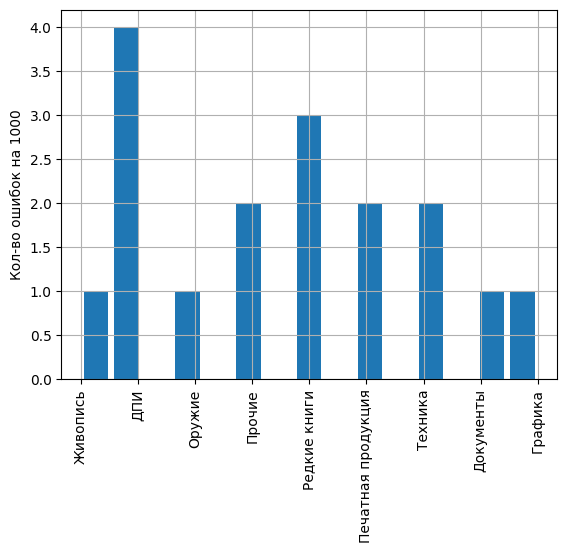

In [46]:
plt = mistakes.group.hist(xrot=90, bins=15, rwidth=0.8)
plt.set_ylabel(f'Кол-во ошибок на {1000}')

Text(0, 0.5, 'Кол-во ошибок на 1000')

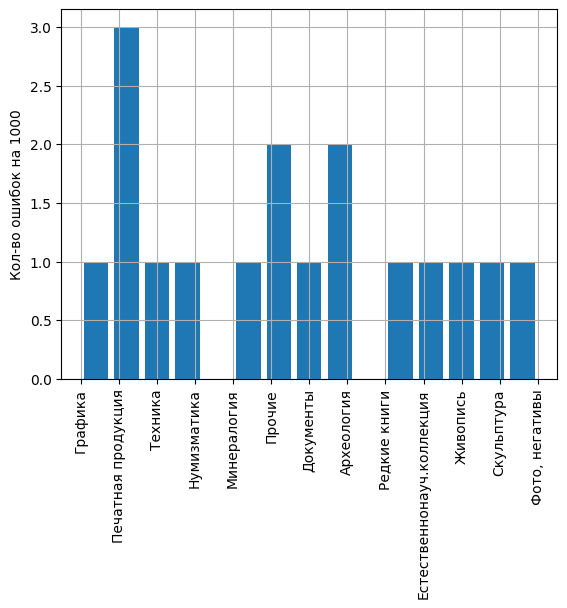

In [48]:
plt = mistakes.group_pred.hist(xrot=90, bins=15, rwidth=0.8)
plt.set_ylabel(f'Кол-во ошибок на {1000}')

In [151]:
import json
from tqdm import tqdm

GEN_EMBEDDING = True
if GEN_EMBEDDING: # if we need to generate embeddings from scratch
    for index, row in tqdm(full_df.iterrows()): 
        if index % 100 == 0: 
            print(index)
        embedding = model.encode_images(Image.open(row.path)).tolist()
        with open(row.embedding_path, 'w') as f:
            f.write(json.dumps(embedding))
    # embs = img_model.encode(df['path'].values.map(lambda p: Image.open(p)))
    # for i, emb in enumerate(embs): 
    #     with open(df.iloc[[i]].path.values[0], 'w') as f:
    #         json.dumps(emb.tolist())

1it [00:00,  9.14it/s]

0


101it [00:08, 11.79it/s]

100


201it [00:18, 10.11it/s]

200


301it [00:28, 11.33it/s]

300


402it [00:38, 10.47it/s]

400


501it [00:47, 12.59it/s]

500


601it [00:56, 13.18it/s]

600


702it [01:06, 11.36it/s]

700


800it [01:15, 13.02it/s]

800


900it [01:26, 10.80it/s]

900


1000it [01:36, 10.10it/s]

1000


1101it [01:46, 11.47it/s]

1100


1202it [01:56, 11.43it/s]

1200


1301it [02:05, 10.36it/s]

1300


1401it [02:14, 10.92it/s]

1400


1500it [02:25, 10.43it/s]

1500


1601it [02:35, 10.19it/s]

1600


1702it [02:44, 11.25it/s]

1700


1801it [02:55,  9.33it/s]

1800


1901it [03:04, 11.40it/s]

1900


2002it [03:14, 11.52it/s]

2000


2101it [03:23, 11.86it/s]

2100


2202it [03:33, 11.37it/s]

2200


2301it [03:44,  9.53it/s]

2300


2401it [03:53, 11.44it/s]

2400


2501it [04:03, 10.34it/s]

2500


2601it [04:13,  9.67it/s]

2600


2702it [04:23, 10.09it/s]

2700


2801it [04:33, 11.82it/s]

2800


2899it [04:42, 10.83it/s]

2900


3001it [04:53,  9.17it/s]

3000


3101it [05:02,  9.97it/s]

3100


3202it [05:12,  9.96it/s]

3200


3302it [05:22, 10.89it/s]

3300


3400it [05:31, 11.99it/s]

3400


3502it [05:41, 10.59it/s]

3500


3601it [05:50,  8.64it/s]

3600


3701it [06:01,  9.25it/s]

3700


3801it [06:11, 10.42it/s]

3800


3901it [06:21, 10.21it/s]

3900


4001it [06:30, 11.01it/s]

4000


4101it [06:40, 10.54it/s]

4100


4202it [06:50, 10.79it/s]

4200


4301it [07:00, 10.22it/s]

4300


4401it [07:10, 11.55it/s]

4400


4502it [07:20, 10.31it/s]

4500


4601it [07:31,  9.04it/s]

4600


4702it [07:40, 11.08it/s]

4700


4802it [07:49, 11.35it/s]

4800


4901it [07:59, 10.97it/s]

4900


5001it [08:09, 11.09it/s]

5000


5099it [08:19, 11.66it/s]

5100


5201it [08:29, 10.44it/s]

5200


5301it [08:39,  9.19it/s]

5300


5402it [08:48,  9.82it/s]

5400


5502it [08:58,  8.86it/s]

5500


5602it [09:08, 11.67it/s]

5600


5702it [09:18, 10.70it/s]

5700


5801it [09:28, 10.06it/s]

5800


5900it [09:38, 11.18it/s]

5900


6000it [09:48, 10.28it/s]

6000


6099it [09:58, 11.27it/s]

6100


6202it [10:09,  9.94it/s]

6200


6301it [10:18, 10.73it/s]

6300


6402it [10:28,  9.77it/s]

6400


6502it [10:39,  9.95it/s]

6500


6602it [10:49, 10.64it/s]

6600


6702it [10:59, 10.65it/s]

6700


6801it [11:08,  9.01it/s]

6800


6900it [11:18,  8.71it/s]

6900


7001it [11:28, 10.50it/s]

7000


7101it [11:38, 11.12it/s]

7100


7201it [11:49, 10.54it/s]

7200


7302it [11:58, 11.32it/s]

7300


7402it [12:08, 10.76it/s]

7400


7502it [12:17, 10.97it/s]

7500


7600it [12:27,  9.51it/s]

7600


7701it [12:37, 10.90it/s]

7700


7801it [12:46, 11.63it/s]

7800


7901it [12:55, 11.42it/s]

7900


8001it [13:04, 10.46it/s]

8000


8100it [13:14, 10.98it/s]

8100


8201it [13:24, 11.82it/s]

8200


8302it [13:33, 11.90it/s]

8300


8402it [13:43, 11.58it/s]

8400


8502it [13:53, 11.93it/s]

8500


8602it [14:02, 11.31it/s]

8600


8702it [14:12,  9.75it/s]

8700


8802it [14:21, 11.97it/s]

8800


8901it [14:31, 11.72it/s]

8900


9000it [14:40,  9.41it/s]

9000


9102it [14:50, 12.00it/s]

9100


9201it [14:59, 11.89it/s]

9200


9301it [15:08, 10.01it/s]

9300


9401it [15:18, 11.06it/s]

9400


9501it [15:27, 10.01it/s]

9500


9601it [15:36, 10.20it/s]

9600


9701it [15:47, 11.95it/s]

9700


9802it [15:57, 10.75it/s]

9800


9901it [16:06, 10.13it/s]

9900


10001it [16:16, 11.34it/s]

10000


10102it [16:25, 11.58it/s]

10100


10201it [16:35, 10.90it/s]

10200


10301it [16:45,  9.92it/s]

10300


10402it [16:55,  9.73it/s]

10400


10501it [17:06,  8.31it/s]

10500


10602it [17:16, 10.33it/s]

10600


10701it [17:25,  9.49it/s]

10700


10801it [17:35, 10.98it/s]

10800


10901it [17:44, 10.02it/s]

10900


11002it [17:54, 10.54it/s]

11000


11102it [18:03, 11.48it/s]

11100


11202it [18:13, 10.14it/s]

11200


11302it [18:23, 10.52it/s]

11300


11400it [18:33,  9.10it/s]

11400


11501it [18:42, 10.21it/s]

11500


11601it [18:52, 11.03it/s]

11600


11702it [19:02, 11.50it/s]

11700


11801it [19:11, 10.87it/s]

11800


11901it [19:21,  6.64it/s]

11900


12001it [19:31, 11.04it/s]

12000


12101it [19:41, 12.02it/s]

12100


12202it [19:50, 11.50it/s]

12200


12301it [20:00, 10.81it/s]

12300


12401it [20:10,  9.46it/s]

12400


12502it [20:21, 10.69it/s]

12500


12602it [20:30, 10.72it/s]

12600


12702it [20:40,  9.95it/s]

12700


12801it [20:50, 10.11it/s]

12800


12899it [21:00, 11.70it/s]

12900


13001it [21:10,  8.94it/s]

13000


13101it [21:20,  8.86it/s]

13100


13202it [21:30, 10.08it/s]

13200


13302it [21:40, 10.97it/s]

13300


13401it [21:50, 10.55it/s]

13400


13502it [22:00, 10.47it/s]

13500


13602it [22:10, 11.38it/s]

13600


13701it [22:20, 10.17it/s]

13700


13801it [22:29, 12.32it/s]

13800


13901it [22:39, 11.84it/s]

13900


14001it [22:49,  9.16it/s]

14000


14102it [22:58, 11.49it/s]

14100


14201it [23:07, 10.87it/s]

14200


14301it [23:17, 10.64it/s]

14300


14401it [23:26, 11.09it/s]

14400


14501it [23:36, 10.97it/s]

14500


14601it [23:47,  9.34it/s]

14600


14702it [23:56, 11.19it/s]

14700


14802it [24:06,  8.76it/s]

14800


14901it [24:16,  9.80it/s]

14900


15002it [24:26, 11.20it/s]

15000


15101it [24:36, 10.69it/s]

15100


15201it [24:44, 10.85it/s]

15200


15302it [24:55, 10.94it/s]

15300


15401it [25:05, 11.44it/s]

15400


15501it [25:14, 10.45it/s]

15500


15600it [25:24, 10.74it/s]

15600


15701it [25:34, 10.27it/s]

15700


15800it [25:44, 11.32it/s]

15800


15902it [25:54,  9.73it/s]

15900


16002it [26:03, 11.19it/s]

16000


16102it [26:13, 11.82it/s]

16100


16202it [26:23, 10.44it/s]

16200


16299it [26:32, 11.21it/s]

16300


16401it [26:42, 10.84it/s]

16400


16501it [26:52, 10.13it/s]

16500


16602it [27:01, 10.68it/s]

16600


16701it [27:11, 10.82it/s]

16700


16801it [27:21, 10.76it/s]

16800


16901it [27:31, 10.51it/s]

16900


17002it [27:41, 11.49it/s]

17000


17101it [27:51, 11.11it/s]

17100


17202it [28:01, 10.20it/s]

17200


17302it [28:11, 10.48it/s]

17300


17402it [28:22,  8.84it/s]

17400


17501it [28:32, 11.25it/s]

17500


17601it [28:41, 10.85it/s]

17600


17701it [28:50,  7.25it/s]

17700


17801it [29:02,  8.53it/s]

17800


17901it [29:12,  8.14it/s]

17900


18001it [29:21, 11.84it/s]

18000


18101it [29:31,  7.79it/s]

18100


18202it [29:41,  9.97it/s]

18200


18301it [29:52,  7.35it/s]

18300


18401it [30:01, 11.87it/s]

18400


18502it [30:11, 11.86it/s]

18500


18602it [30:20, 11.23it/s]

18600


18700it [30:30, 11.36it/s]

18700


18802it [30:40, 11.00it/s]

18800


18901it [30:50,  9.96it/s]

18900


19001it [30:59, 10.58it/s]

19000


19101it [31:09, 11.98it/s]

19100


19202it [31:19, 10.89it/s]

19200


19302it [31:29, 11.61it/s]

19300


19401it [31:38, 10.64it/s]

19400


19502it [31:48, 10.38it/s]

19500


19602it [31:58,  9.62it/s]

19600


19700it [32:07, 11.11it/s]

19700


19802it [32:17, 10.52it/s]

19800


19900it [32:26, 11.54it/s]

19900


20002it [32:37,  9.73it/s]

20000


20101it [32:46, 10.60it/s]

20100


20201it [32:56, 10.82it/s]

20200


20301it [33:05,  9.27it/s]

20300


20345it [33:09, 10.23it/s]


In [16]:
large_clip = LargeClipCat()

/Users/roshi/image-search/venv/lib/python3.11/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [49]:
import sys
import clickhouse_connect
import os
import numpy as np
import os
import clickhouse_connect 
from PIL import Image

# factor out dataset.py from ai_model.py

import requests 
from PIL import Image 
from io import BytesIO 

categories = {
    1: 'Живопись',
    2: 'Графика',
    3: 'Скульптура',
    4: 'ДПИ',
    5: 'Нумизматика',
    6: 'Археология',
    8: 'Оружие',
    10: 'Естественнонауч.коллекция',
    11: 'Техника',
    12: 'Прочие',
    # 13: 'Прочие',
    14: 'Редкие книги',
    15: 'Документы',
    16: 'Печатная продукция',
    17: 'Фото, негативы',
    18: 'Минералогия'
}


from tqdm import tqdm


class DB:
    def __init__(self, model): 
        self.model = model
        self.client = clickhouse_connect.get_client(
            host="172.20.10.2",#os.getenv('CLICKHOUSE_HOST') or None, 
            port="8123", #os.getenv('CLICKHOUSE_PORT') or None,
            username=os.getenv('CLICKHOUSE_USERNAME') or None, 
            password=os.getenv('CLICKHOUSE_PASSWORD') or None,
        )
        print('connected to clickhouse')
        self.client.command('''
        CREATE TABLE IF NOT EXISTS museum_imgs (
            object_id Integer, 
            img_name String, 
            name Nullable(String), 
            description Nullable(String), 
            group String,
            image_embedding Array(Float32),
        ) ENGINE MergeTree ORDER BY object_id 
        ''') # TODO: add unique constraint
    
    def insert_museum_imgs(self, df):
        data = [] 
        for index, row in df.iterrows(): 
            image = Image.open(row.path)
            emb = self.model.encode_images(image).tolist()
            row = row.replace({np.nan: None}).to_dict()
            data.append([row['object_id'], row['img_name'], row['name'], row['description'], row['group'], emb])
            if len(data) % 100: 
                self.client.insert('museum_imgs', data, column_names='*')
                data = [] 

        print('inserted', self.client.command('select count(*) from museum_imgs'), 'museum images')

    def insert_parsed(self, df): 
        data = [] 
        for _, row in tqdm(df.iterrows()):
            group = categories.get(row['typologyId'])
            if not group: 
                continue
            for img in row.images: 
                try:
                    resp = requests.get(f"https://goskatalog.ru/muzfo-imaginator/rest/images/public/350/{img['id']}/{img['id']}.jpg")
                    image = Image.open(BytesIO(resp.content))
                    # print(row['name'])
                    # res.append([row.id, img['id'], row['name'], row.typologyId, img['description'],])
                    emb = self.model.encode_images(image).tolist()
                    row = row.replace({np.nan: None}).to_dict()
                except Exception as e:
                    print(e)
                    continue

                #print(len(data))
                # print(group)
                data.append([row['id'], str(img['id'])+'.jpg', row['name'], row.get('description', ''), group,  emb])
                if len(data) % 1000 == 0:
                    self.client.insert('museum_imgs', data, column_names='*')
                    data = []
        print('inserted', self.client.command('select count(*) from museum_imgs'), 'museum images')


    def search_similar(self, img: str | Image.Image):
        if isinstance(img, str): 
            img = Image.open(img) 
        emb = self.model.encode_images(img).tolist()
        return self.search_similar_emb(emb)
    def search_similar_emb(self, emb): 
        parameters = {'query_embedding': emb}
        res = self.client.query('''
            SELECT object_id, group, img_name, L2Distance(image_embedding, {query_embedding:Array(Float32)}) as dist 
            FROM museum_imgs 
            ORDER BY dist ASC
            LIMIT 10
        ''', parameters=parameters)
        return [(str(row[0]), row[1], os.path.join(str(row[0]), row[2])) for row in res.result_rows]
db = DB(large_clip)


SyntaxError: expected ':' (2702298888.py, line 66)

In [31]:
db.insert_museum_imgs(full_df[10000:])

KeyboardInterrupt: 

In [44]:
test_df = full_df[10000:].sample(100)
def predict(path): 
    best = db.search_similar(path)
    return best[0][1]
test_df['group_pred'] = test_df['path'].map(predict)

KeyboardInterrupt: 

In [43]:
mistakes = test_df[test_df['group_pred'] != test_df['group']]
print(1-len(mistakes)/len(test_df))

0.83


In [79]:
mistakes

,object_id,name,description,group,img_name,path,embedding_path,group_pred
14927,29835132,"Щетка, из набора щеток",NaN,Скульптура,34504363.jpg,./mincult-train/train/29835132/34504363.jpg,./mincult-train/train/29835132/34504363.jpg.em...,
19242,19939934,"Бочонок №5. Из набора игры настольной ""ЛОТО""","Цилиндрической формы, сужающейся к основаниям....",ДПИ,51300972.jpg,./mincult-train/train/19939934/51300972.jpg,./mincult-train/train/19939934/51300972.jpg.em...,
10635,19935932,Туристическая карта-схема Крым (сложенная),NaN,Прочие,20640070.jpg,./mincult-train/train/19935932/20640070.jpg,./mincult-train/train/19935932/20640070.jpg.em...,
10797,21615336,"Шпилька костяная для волос, принадлежавшая Л.Ю...","Желто-бежевого цвета, с полукруглой головкой и...",ДПИ,22970322.jpg,./mincult-train/train/21615336/22970322.jpg,./mincult-train/train/21615336/22970322.jpg.em...,
18770,46770795,Фрагмент самолепного сосуда серого цвета прямо...,NaN,Археология,57801041.jpg,./mincult-train/train/46770795/57801041.jpg,./mincult-train/train/46770795/57801041.jpg.em...,
15327,19936689,Браслет женский,NaN,ДПИ,20641703.jpg,./mincult-train/train/19936689/20641703.jpg,./mincult-train/train/19936689/20641703.jpg.em...,
19578,43799107,Журнал «Советская медицина» № 4.,NaN,Документы,53891140.jpg,./mincult-train/train/43799107/53891140.jpg,./mincult-train/train/43799107/53891140.jpg.em...,
11387,46784763,Фотонегатив. Дни газеты «Правда» в Красноярске,Красноярский филиал Центрального музея им. В.И...,"Фото, негативы",57818575.jpg,./mincult-train/train/46784763/57818575.jpg,./mincult-train/train/46784763/57818575.jpg.em...,
14578,19928101,А.Б. Палладин. О химическом взаимодействии орг...,С.-Петербург: издательство Панафидиной. 1913 г...,Печатная продукция,20627444.jpg,./mincult-train/train/19928101/20627444.jpg,./mincult-train/train/19928101/20627444.jpg.em...,
15942,10718853,Накидка,"Накидка квадратной формы, состоит из 16 малень...",ДПИ,7929457.jpg,./mincult-train/train/10718853/7929457.jpg,./mincult-train/train/10718853/7929457.jpg.emb...,


In [28]:
import json
response = json.load(open('response3.json')) 
resp_df = pandas.DataFrame.from_dict(response['objects'])
resp_df['group'] = resp_df['typologyId'].map(lambda g: categories.get(g, ''))

In [29]:
resp_df['group'].value_counts()

group
Естественнонауч.коллекция    5094
Археология                   2491
Графика                      2302
Печатная продукция           2201
Фото, негативы               1922
                             1834
Документы                    1432
Минералогия                   733
Живопись                      474
Редкие книги                  441
Прочие                        394
Нумизматика                   340
Техника                       226
Скульптура                     86
Оружие                         30
Name: count, dtype: int64

In [32]:
response4 = json.load(open('response4.json')) 
resp_df4 = pandas.DataFrame.from_dict(response4['objects'])
resp_df4['group'] = resp_df4['typologyId'].map(lambda g: categories.get(g, ''))
resp_df4['group'].value_counts()

group
Естественнонауч.коллекция    3861
Археология                   3172
Оружие                       3171
Графика                      1782
                             1689
Документы                    1428
Прочие                       1264
Фото, негативы               1224
Печатная продукция            797
Живопись                      796
Редкие книги                  380
Техника                       307
Скульптура                     63
Минералогия                    57
Нумизматика                     9
Name: count, dtype: int64

In [35]:
db.insert_parsed(resp_df4[400:])

6541it [58:41,  1.86it/s]


KeyboardInterrupt: 

In [37]:
df.head()

,object_id,name,description,group,img_name,path,embedding_path
0,10669820,Водолей - коник (фрагмент - голова),"сероглиняный, лепной, со сплошным белым ангобо...",Археология,7862029.jpg,./mincult-train/train/10669820/7862029.jpg,./mincult-train/train/10669820/7862029.jpg.emb...
1,4489444,Винтовка «Самозарядная винтовка Токарева» (мет...,"На стволе имеется надульник, на торце которог...",Оружие,9461061.jpg,./mincult-train/train/4489444/9461061.jpg,./mincult-train/train/4489444/9461061.jpg.embe...
2,8722586,Инструмент. Калибр-скоба,Прямоугольная пластина с усечёнными углами и д...,Прочие,5095122.jpg,./mincult-train/train/8722586/5095122.jpg,./mincult-train/train/8722586/5095122.jpg.embe...
3,3712248,"Судомодель. НИС ""Космонавт Виктор Пацаев"".","Корпус модели, надстройки, шлюпки выполнены и...",Прочие,551422.jpg,./mincult-train/train/3712248/551422.jpg,./mincult-train/train/3712248/551422.jpg.embed...
4,6339754,Сабля.,NaN,Оружие,2592073.jpg,./mincult-train/train/6339754/2592073.jpg,./mincult-train/train/6339754/2592073.jpg.embe...


In [43]:
resp_df.columns

Index(['id', 'name', 'regNumber', 'type', 'statusId', 'museumId', 'typologyId',
       'actionTypeId', 'revisionId', 'regReasonId', 'orderNumber',
       'orderExclusionNumber', 'invNumber', 'gikNumber', 'gikCodePart',
       'gikNumPart', 'specNumber', 'imported', 'museumCode', 'regDate',
       'orderDate', 'createDate', 'extExhibitId', 'extSystemId', 'mainImage',
       'taskId', 'messageId', 'dealId', 'dealSubtypeId', 'rentDateFrom',
       'rentDateTo', 'readOnly', 'authors', 'technologies', 'images'],
      dtype='object')

In [58]:
import requests 
from PIL import Image 
from io import BytesIO 

categories = {
    1: 'Живопись',
    2: 'Графика',
    3: 'Скульптура',
    4: 'ДПИ',
    5: 'Нумизматика',
    6: 'Археология',
    8: 'Оружие',
    10: 'Естественнонауч.коллекция',
    11: 'Техника',
    12: 'Прочие',
    14: 'Редкие книги',
    15: 'Документы',
    16: 'Печатная продукция',
    17: 'Фото, негативы',
    18: 'Минералогия'
}
for _, row in resp_df.iterrows():
    res = [] 
    # print(row)
    # imgs = json.loads(row.images) 
    for img in row.images: 
        resp = requests.get(f'https://goskatalog.ru/muzfo-imaginator/rest/images/public/350/{img['id']}/{img['id']}.jpg')
        img = Image.open(BytesIO(resp.content))
        print(row['name'])
        res.append([row.id, img['id'], row['name'], row.typologyId, img['description'],])
    print(res)


ꓲꓦ зал экспозиции ГИКМ "Великая Отечественная война". 27 августа 1981 г. Экспозиционер Федотова Н.К., художник-оформитель Шальнов Ю.Н., член Союза художников СССР.
[[43205806, 53092028, 'ꓲꓦ зал экспозиции ГИКМ "Великая Отечественная война". 27 августа 1981 г. Экспозиционер Федотова Н.К., художник-оформитель Шальнов Ю.Н., член Союза художников СССР.', 17, None]]
ꓲꓦ зал экспозиции ГИКМ "Великая Отечественная война". 27 августа 1981 г. экспозиционер Федотова Н.К., художник-оформитель Шальнов Ю.Н., член Союза художников СССР.
[[43205883, 53092084, 'ꓲꓦ зал экспозиции ГИКМ "Великая Отечественная война". 27 августа 1981 г. экспозиционер Федотова Н.К., художник-оформитель Шальнов Ю.Н., член Союза художников СССР.', 17, None]]
შერჩეული პედაგოგიური ესეები (Избранные педагогические сочинения).
[[40999930, 49897296, 'შერჩეული პედაგოგიური ესეები (Избранные педагогические сочинения).', 14, None]]
აბესაძე ნია. მზე მუდამ ამოდის.- Тбилиси: Издательство "Мерани", 1975.- 51, [1]c., портр. Абесадзе Ния Ге

In [42]:
resp_df.images[0]

[{'id': 53092028,
  'code': '53092028',
  'fileName': None,
  'description': None,
  'mimeType': None,
  'imageType': None,
  'imageNumber': None,
  'imageDate': None,
  'crc': None,
  'location': 'public',
  'status': None,
  'lastError': None,
  'deleted': False,
  'main': True}]

In [51]:
df.head()

,object_id,name,description,group,img_name,path,embedding_path
0,10669820,Водолей - коник (фрагмент - голова),"сероглиняный, лепной, со сплошным белым ангобо...",Археология,7862029.jpg,../mincult-train/train/10669820/7862029.jpg,../mincult-train/train/10669820/7862029.jpg.em...
1,4489444,Винтовка «Самозарядная винтовка Токарева» (мет...,"На стволе имеется надульник, на торце которог...",Оружие,9461061.jpg,../mincult-train/train/4489444/9461061.jpg,../mincult-train/train/4489444/9461061.jpg.emb...
2,8722586,Инструмент. Калибр-скоба,Прямоугольная пластина с усечёнными углами и д...,Прочие,5095122.jpg,../mincult-train/train/8722586/5095122.jpg,../mincult-train/train/8722586/5095122.jpg.emb...
3,3712248,"Судомодель. НИС ""Космонавт Виктор Пацаев"".","Корпус модели, надстройки, шлюпки выполнены и...",Прочие,551422.jpg,../mincult-train/train/3712248/551422.jpg,../mincult-train/train/3712248/551422.jpg.embe...
4,6339754,Сабля.,NaN,Оружие,2592073.jpg,../mincult-train/train/6339754/2592073.jpg,../mincult-train/train/6339754/2592073.jpg.emb...


In [67]:
def get_pred(base_dataset_path, images_dir, csv_name): 
    df = pandas.read_csv(os.path.join(base_dataset_path, csv_name), sep=';')[:10]
    data = [] 
    for _, row in df.iterrows():
        obj_id, img_name = str(row['object_id']), row['img_name']
        path = os.path.join(base_dataset_path, images_dir, obj_id, img_name)
        best = db.search_similar(path)
        cat = best[0][1]
        data.append([obj_id, img_name, cat])
    return data

In [77]:
import time
def submit(data): 
    with open(f'submission-{time.time()}.csv', 'w') as f: 
        f.write('object_id;img_name;group\n') 
        for id, img, group in data: 
            f.write(f'{id};{img};{group}\n')


In [79]:
pred = get_pred('../mincult-train/', 'train', 'train.csv') 
submit(pred)